In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Australia-climate-map_MJC01_french.png/390px-Australia-climate-map_MJC01_french.png")

In [11]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('weatherAUS.csv', sep = ',', header = 0)

df = df.sort_values('Location')
display(df.head())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96988,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.6,ENE,22.0,ENE,NW,9.0,7.0,66.0,48.0,1028.4,1024.7,NaN,NaN,15.7,21.0,No,No
98443,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,NaN,N,24.0,NaN,NNE,0.0,11.0,75.0,32.0,1024.2,1021.1,NaN,NaN,9.6,18.5,No,No
98444,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,NaN,NE,52.0,NNE,NE,9.0,20.0,35.0,51.0,1017.9,1011.5,NaN,NaN,14.7,15.4,No,Yes
98445,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,NaN,NNE,50.0,NW,NW,17.0,26.0,96.0,80.0,1007.4,1008.0,NaN,NaN,11.2,14.0,Yes,Yes
98446,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,NaN,NW,30.0,WNW,WNW,13.0,15.0,89.0,70.0,1018.4,1019.2,NaN,NaN,13.0,15.3,Yes,Yes


In [12]:

cities = pd.read_csv('au.csv', sep = ',', header = 0)
cities.head()



,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Uluru,-25.3450,131.0361,NaN,NaN,NaN,NaN,0,NaN
1,Katherine,-14.4666,132.2666,NaN,NaN,NaN,NaN,6303,NaN
2,AliceSprings,-23.7000,133.8700,NaN,NaN,NaN,NaN,25912,NaN
3,Walpole,-34.9800,116.7000,NaN,NaN,NaN,NaN,336,NaN
4,SalmonGums,-32.9800,121.6450,NaN,NaN,NaN,NaN,146,NaN


In [13]:
locations = df['Location'].unique()
display(locations)

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [14]:
import numpy as np

mask = cities['city'].isin(locations)
df_cities = cities[mask]
#df_cities = df_cities.reset_index(drop=True, inplace = True)
df_cities = df_cities.sort_values('city')
df_cities['city'].unique()

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

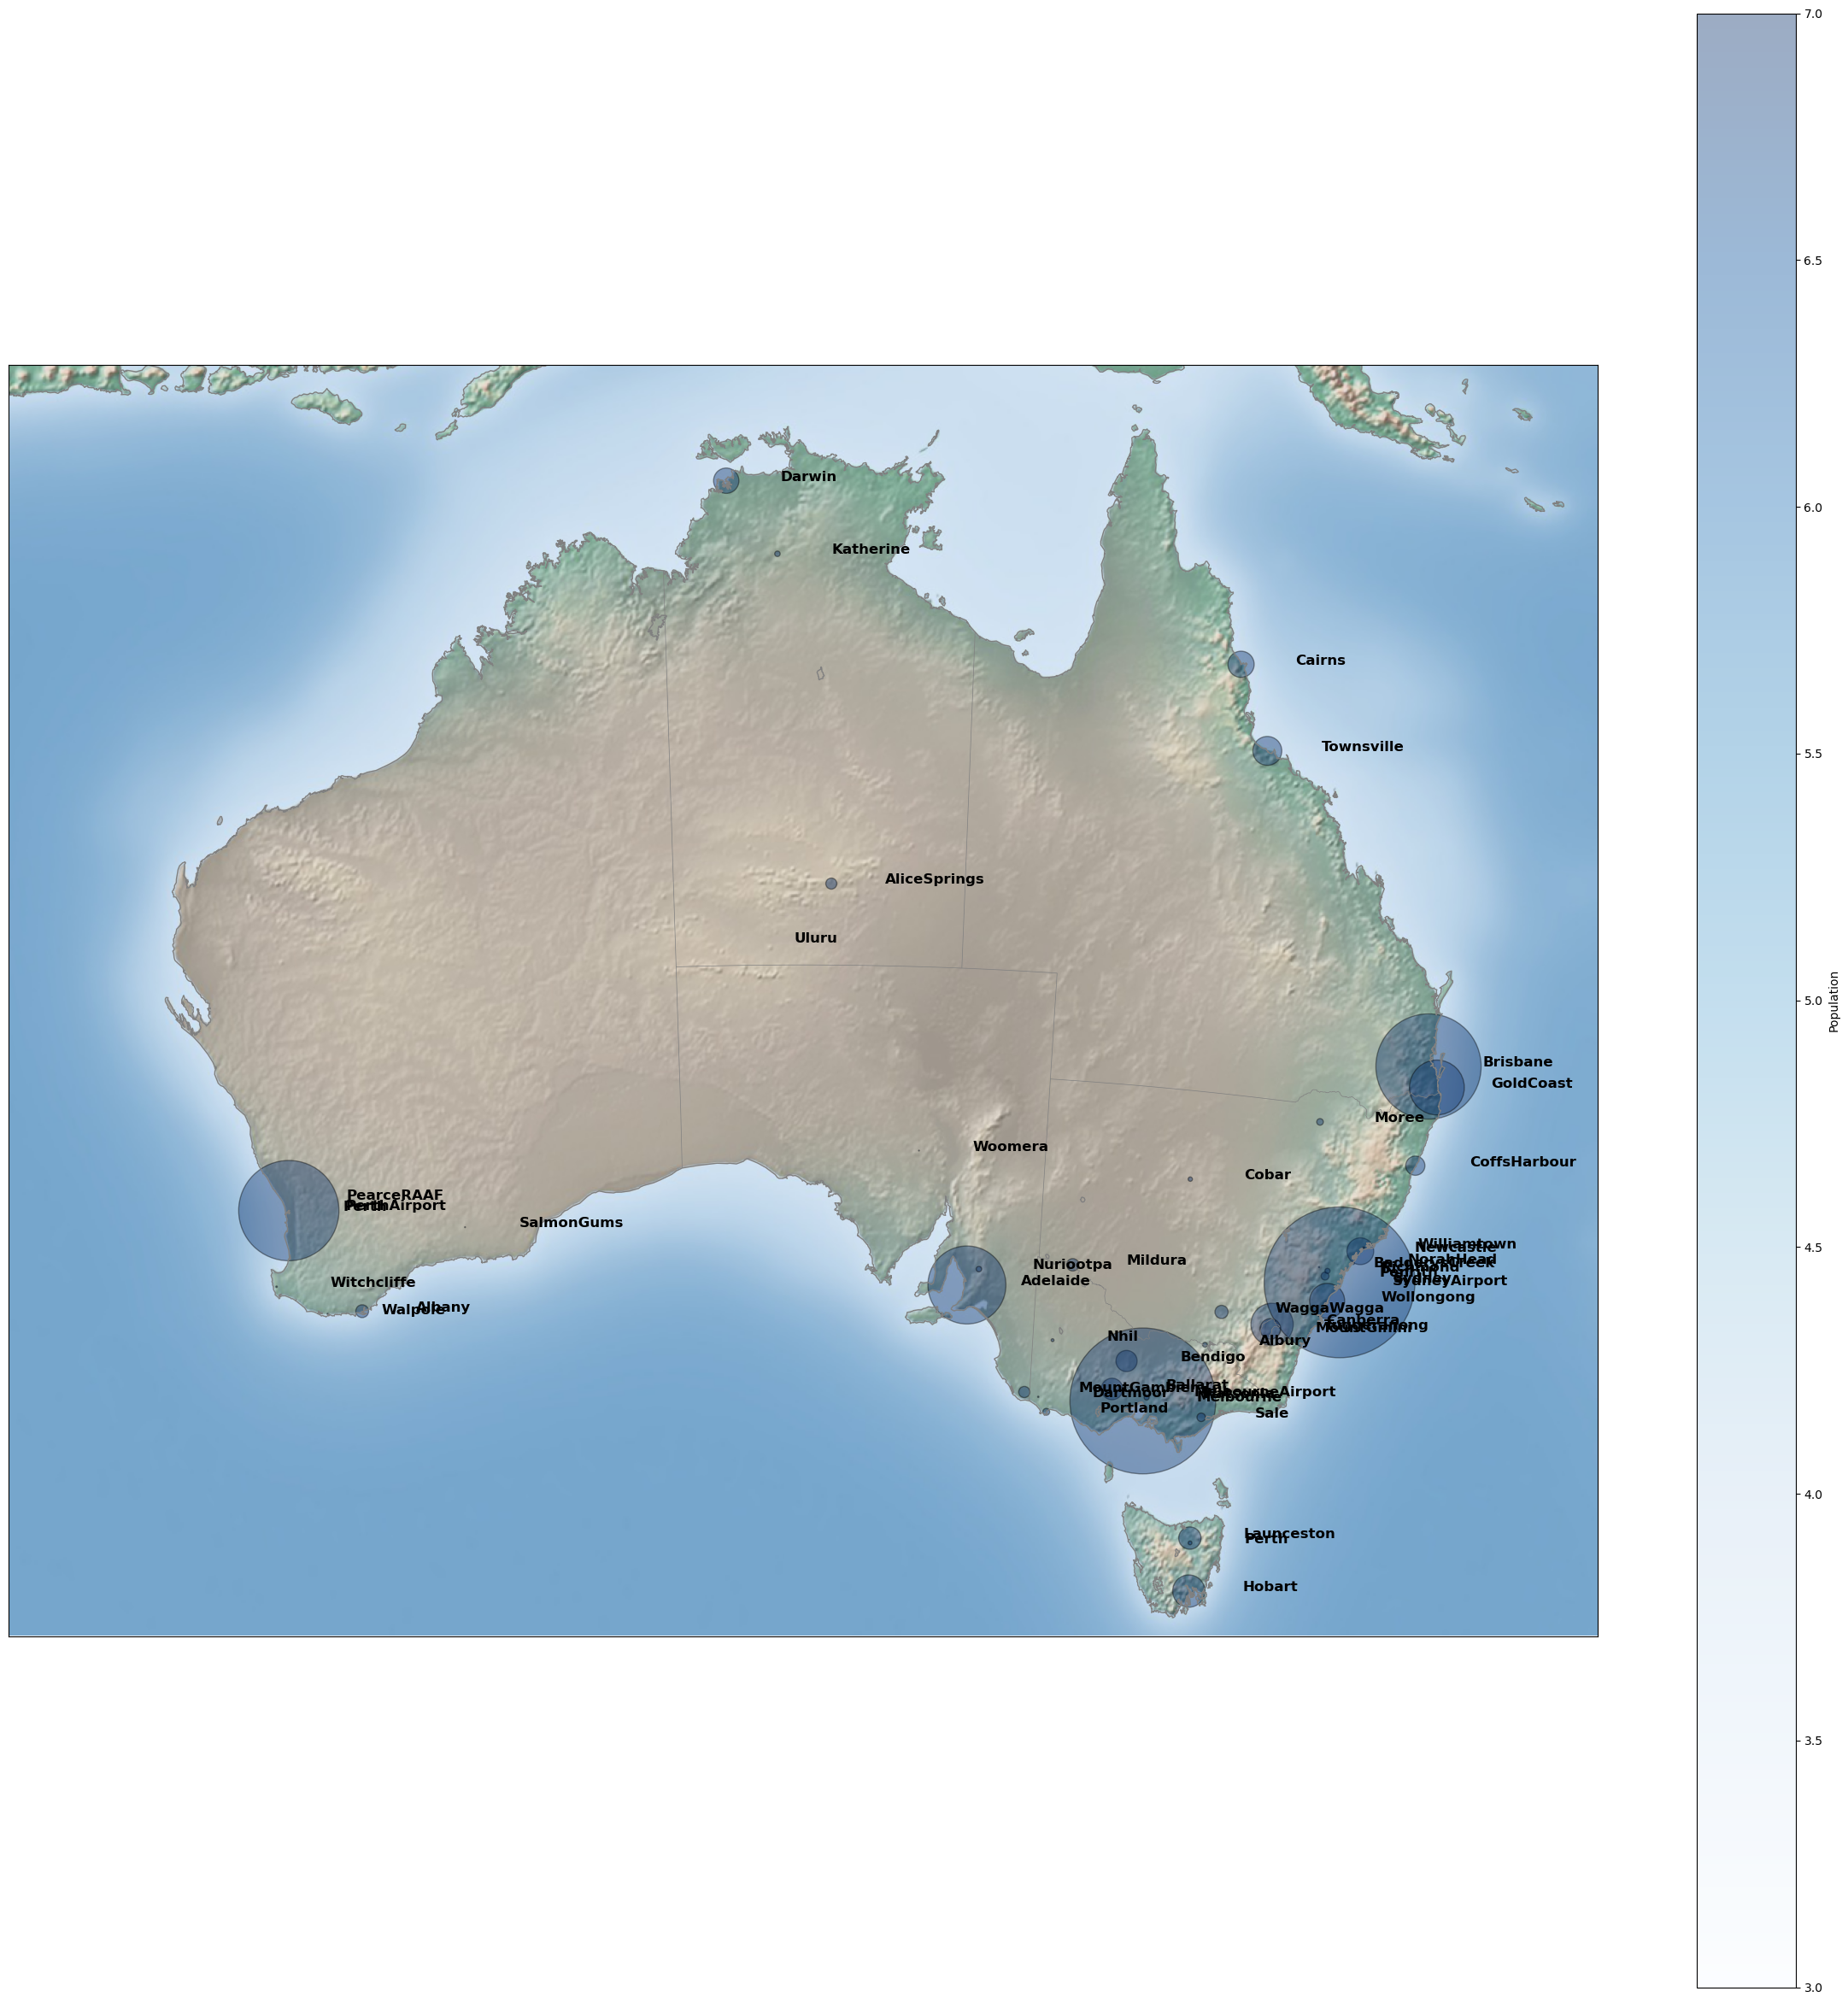

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyproj
import mpl_toolkits

mpl_toolkits.__path__.append('C:/Users/chrom/anaconda3/Lib/site-packages/mpl_toolkits/')
pyproj.__path__.append('C:/Users/chrom/anaconda3/Lib/site-packages/')
#_geoslib.__path__.append('C:/Users/chrom/anaconda3/pkgs/basemap-1.3.7-py311h4cd37dd_0/Lib/site-packages/')
from mpl_toolkits.basemap import Basemap


lat = df_cities['lat'].values
lon = df_cities['lng'].values
pop = df_cities['population']/300
cit = df_cities['city']

fig = plt.figure(figsize = (30, 30))
m = Basemap(projection='lcc', resolution='i', lat_0=-27.0, lon_0=133.0, width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
m.scatter(lon, lat, latlon=True, c=pop*100, s=pop, cmap='Blues', alpha=0.4, edgecolor = 'black')


for i, txt in enumerate(cit):
    x, y = m(lon[i], lat[i])
    plt.annotate(txt, xy = (x+170000,y-1000), fontsize=12, weight='bold')

plt.colorbar(label="Population")
plt.clim(3, 7)

